=== Handle imports and paths ===

In [ ]:
import sys
sys.path.append('/mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/') 
sys.path.append('/mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/functions/') 
from paths_and_imports import *
from control_flow_functions import *
from nn_optim_unet import *
from postprocessing import *
from dataset_config import datasets
%load_ext autoreload
%autoreload 2

=== Load the trained model ===

In [2]:
trained_model = get_gnn(fs=feature_scale, dropout_levels=dropout_levels, 
                           pooling_path=pooling_path, ico_levels=ico_levels)    
trained_model.load_state_dict(torch.load(f'{output_dir}trained_weights.pth'))

<All keys matched successfully>

=== Test the trained model on the sex-masked sets ===

Males

MAE (L1) Loss: 7.512 across 558 observations
Variance and MAE Loss: 100.064 across 558 observations


Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_m_raw_age_gaps.png
Figure stats: mean = -4.2767806058275095 ; median = -3.710363733845398 ; std = 6.170789954394996 ; var = 38.07864866126219
Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_m_corrected_age_gaps.png
Figure stats: mean = 0.22272135057895667 ; median = 0.15169827351429888 ; std = 2.331326511779895 ; var = 5.435083304527813

Top 10 significant age gaps:

                  region hemi       age_gap variance  skew  region_avg     adj_pval
          S_pericallosal   lh -3.70 (-8.20)    51.28  0.00       -2.61 1.744441e-18
   G_oc-temp_med-Parahip   rh -3.17 (-7.67)    52.20 -0.15       -2.71 1.674038e-13
       S_orbital_lateral   lh  3.14 (-1.36)    43.24 -0.48        2.90 6.603652e-14
       S_orbital_lateral   rh  2.65 (-1.85)    41.09 -0.21    

<Figure size 640x480 with 0 Axes>

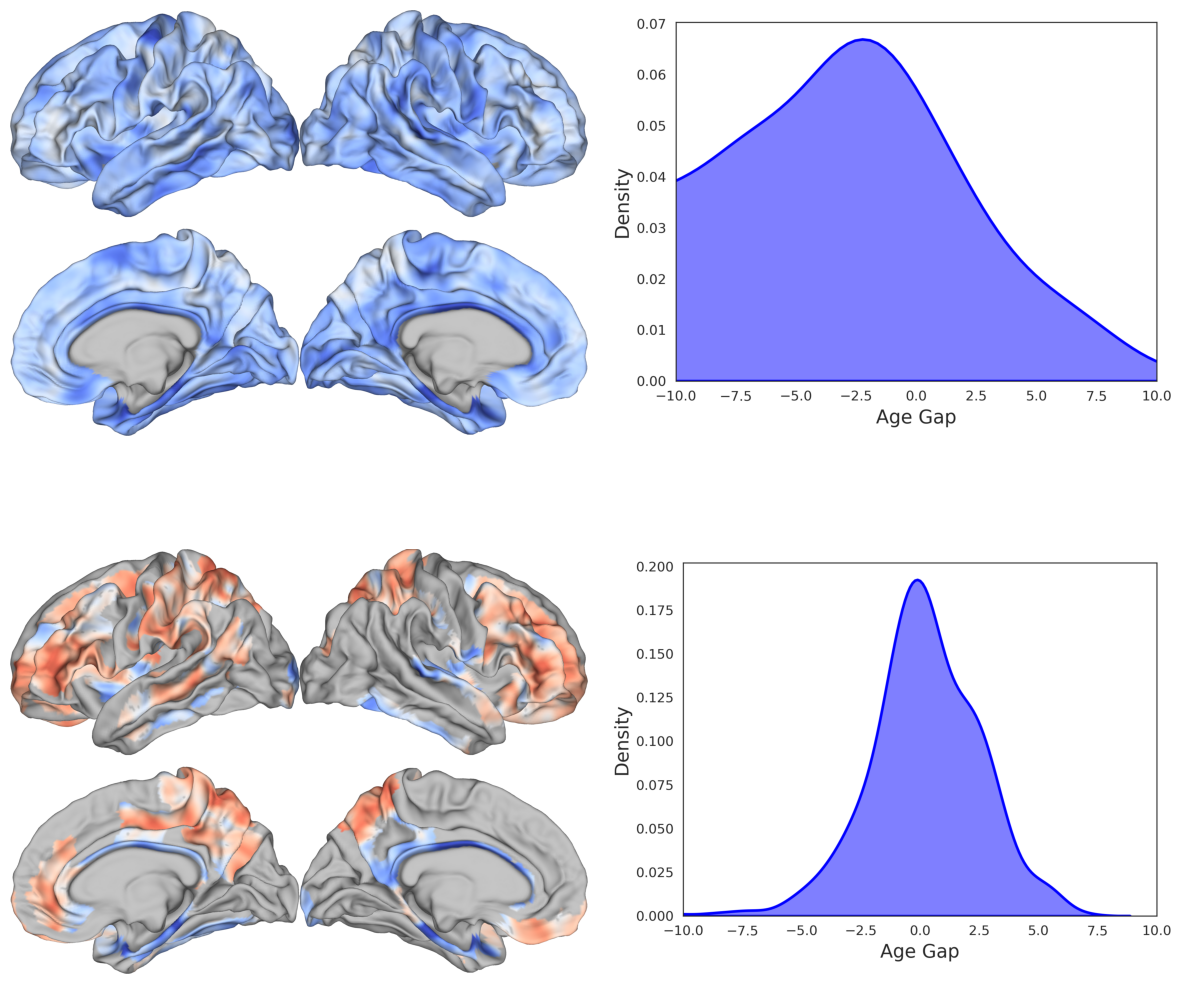

In [3]:
suffix='test_m'
test_model(X_test_CN, y_test_CN, 
           model=trained_model, 
           mask=np.load(f'{data_dir}sex_ADNI_CN.npy') == 'Male', 
           suffix=suffix, test_size=1)
postprocess_model(suffix, factors=np.load(f'{output_dir}test_CN_factors.npy'), global_limits=10)

Females

MAE (L1) Loss: 7.157 across 570 observations
Variance and MAE Loss: 90.891 across 570 observations


Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_f_raw_age_gaps.png
Figure stats: mean = -2.8991300334835244 ; median = -2.8866593581716984 ; std = 6.195540358257054 ; var = 38.38472033079194
Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_f_corrected_age_gaps.png
Figure stats: mean = -0.2183888739440186 ; median = 0.014016830234197641 ; std = 2.5173504779773386 ; var = 6.337053428972735

Top 10 significant age gaps:

               region hemi       age_gap variance  skew  region_avg     adj_pval
       S_pericallosal   lh -4.15 (-6.83)    58.66 -0.08       -3.17 2.203519e-20
G_oc-temp_med-Parahip   rh -3.68 (-6.36)    67.91 -0.16       -3.21 1.031162e-14
S_temporal_transverse   rh -3.57 (-6.25)    64.65 -0.14       -1.32 4.251037e-14
G_oc-temp_med-Parahip   lh -2.75 (-5.43)    64.76 -0.16       -3.21 9.33

<Figure size 640x480 with 0 Axes>

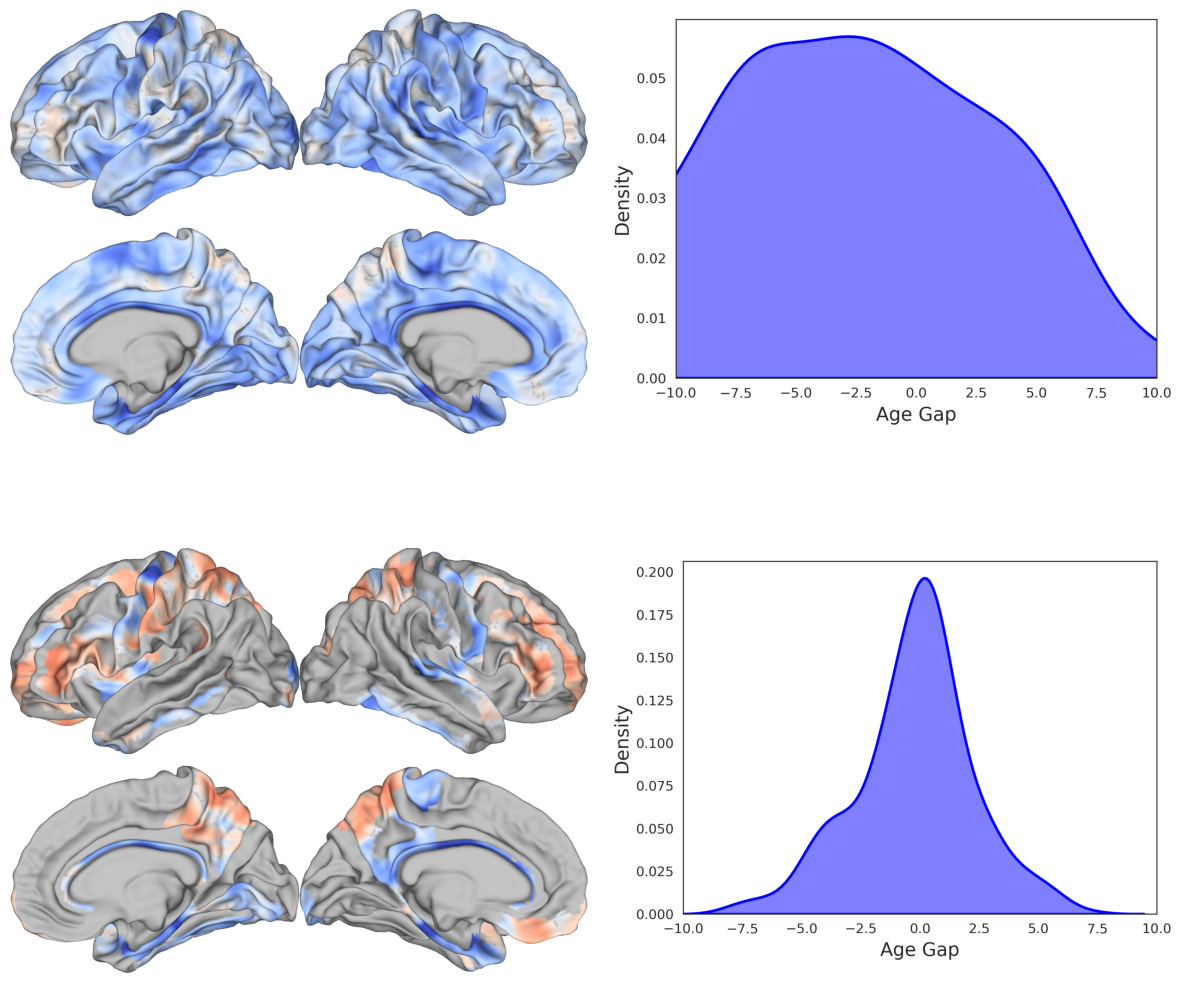

In [4]:
suffix='test_f'
test_model(X_test_CN, y_test_CN, 
           model=trained_model, 
           mask=np.load(f'{data_dir}sex_ADNI_CN.npy') == 'Female', 
           suffix=suffix, test_size=1)
postprocess_model(suffix, factors=np.load(f'{output_dir}test_CN_factors.npy'), global_limits=10)

View L-BAG difference for males and females

In [13]:
pred_MEs_pruned, ref_MEs_pruned = compare_cohorts(suffix='f-m', cohort_pred='test_CN', cohort_ref='test_CN', # pred - ref
                                                  mask = np.load(f'{data_dir}sex_ADNI_CN.npy'), 
                                                  mask_split={'pred' : 'Female', 'ref' : 'Male'})

Significant (p = 0.00) differences in CA distribution across cohorts detected, performing bootstrapping...



Top 10 significant age gaps:

Empty DataFrame
Columns: [region, hemi, age_gap, t_stat, raw_pval, region_avg, adj_pval, significant]
Index: []
No significant regions found


Display the age gaps of the Male and Female sets (pruned for CA matching)

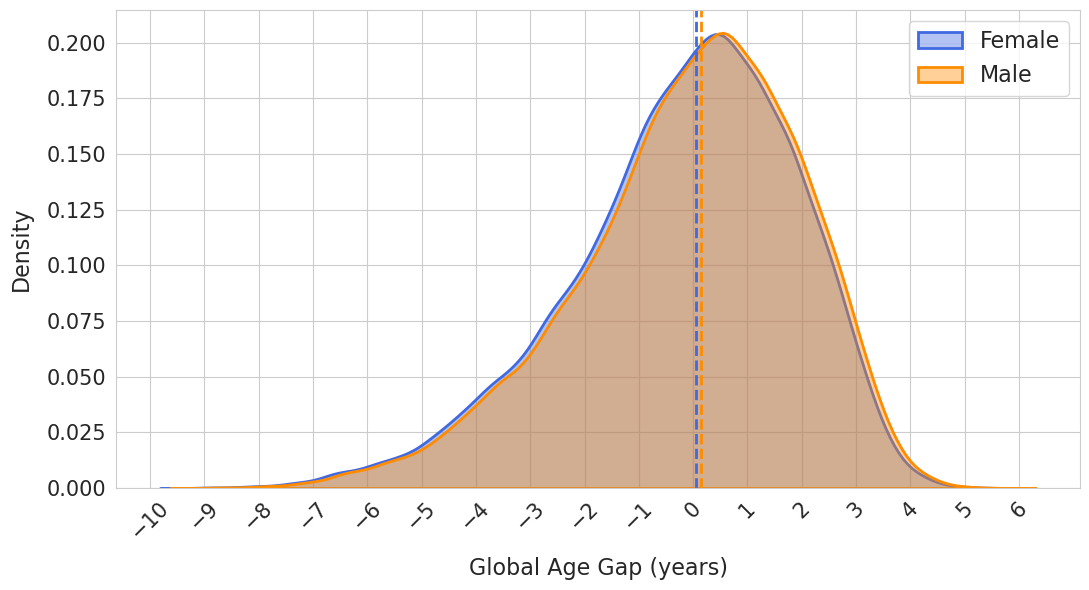

In [14]:
compare_age_gaps(pred_MEs_pruned, 'Female', ref_MEs_pruned, 'Male', x_step=1)
plt.savefig(f'{output_dir}f_m_AGs.png')

Get the region stats, including average age gap, for CNs, ADs, and AD-CNs

In [15]:
print('\n\nFemales\n')
show_ranked_differences(suffix='test_f', output_dir=output_dir)
print('\n\nMales\n')
show_ranked_differences(suffix='test_m', output_dir=output_dir)
print('\n\nFemales-Males\n')
show_ranked_differences(suffix='f-m', output_dir=output_dir)



Females


All regions ranked by average age gap:
Region                               Avg Gap   LH Gap   RH Gap
-------------------------------------------------------------------------------------
S_orbital_lateral                       2.40     2.65     2.14 
G_and_S_transv_frontopol                1.93     2.11     1.75 
G_parietal_sup                          1.81     2.03     1.59 
G_front_inf-Triangul                    1.76     1.90     1.62 
Lat_Fis-ant-Vertical                    1.72     2.41     1.02 
S_front_middle                          1.59     1.01     2.17 
Lat_Fis-ant-Horizont                    1.58     1.61     1.56 
S_front_sup                             1.56     1.59     1.54 
S_intrapariet_and_P_trans               1.47     1.31     1.63 
G_and_S_frontomargin                    1.47     1.36     1.57 
S_front_inf                             1.31     1.46     1.17 
S_postcentral                           1.30     1.50     1.10 
G_precuneus                     